# Classic: Magna-Tile Pyramids

The [link](https://fivethirtyeight.com/features/can-you-roll-the-perfect-bowl/).

We have congruent isosceles triangle Magna-Tiles with the unique angle at 30°. We can create pyramids by "click"ing between 3 and 11 of them together and placing them on a flat surface. Which such pyramid has the greatest volume?

Our tiles are congruent, so the base of this pyramid will be a regular polygon. We therefore have a _regular pyramid_. Now a fun fact that has stuck in my head since middle school is that the volume of a regular pyramid $V$ is always $V=\frac{1}{3}Bh$, where $B$ is the area of the base and $h$ is the pyramid height. [MathWorld](https://mathworld.wolfram.com/Pyramid.html) confirms as much and gives a concise but gratifying proof of this formula using calculus. This reduces our workload to simply finding $B$ and $h$.

MathWorld would probably be willing to also give us the formula for area of a regular polygon (an n-gon), but let's flex some logic here. We'll assume that the base of our Magna-Tiles - and thus the edges of our n-gon - measure 1. Now if we draw lines from the center of the n-gon to each vertex, we will divide the n-gon into congruent, isosceles triangles. The actual measure of our tiles isn't as interesting here, because we are dealing with the projection of these tiles onto the surface, thus distorting the angles of the tiles themselves. These lines are technically radii of the circle that circumscribes our polygon, so we'll call this measure $r$.

Now the area of our n-gon is n times the area of one of its triangle sections. We know the base $b$ of such a triangle is 1. Its height we can derive with some trigonometry. Notice that at the origin, because all of the edges are equal, the spacing between the radii are also equal. This means the angles formed by the radii, i.e. the inner angles of the triangle sections, are also all equivalent. If we call one of these angles $\phi$, then we have $\phi=\frac{360}{n}$. If we construct a bisector of an edge through the n-gon origin, we get $\frac{\phi}{2}$. If the height of this triangle section is $\gamma$, we have:

$$
\begin{aligned}
\tan\left(\frac{\phi}{2}\right)&=\frac{b/2}{\gamma} \\
\tan\left(\frac{\phi}{2}\right)&=\frac{1/2}{\gamma} \\
\gamma&=\frac{1}{2\tan(\phi/2)} \\
&=\frac{1}{2\tan(180/n)}
\end{aligned}
$$

Put it together:

$$
\begin{aligned}
B &= n \times \left(\frac{1}{2} \times b \times \gamma\right) \\
&= n \times \left(\frac{1}{2} \times 1 \times \frac{1}{2\tan\left(180/n\right)}\right) \\
&= \frac{n}{4\tan(180/n)}
\end{aligned}
$$

Sweet. Now the height of the pyramid $h$. Consider a cross section of the pyramid aligned with one of the base's radii. It's a triagle with the hypotenuse corresponding to the edge of Magna-Tile (call it $d$), and the legs correspond to the height of the pyramid $h$ and the radius $r$. Deriving $r$ is similar to $\gamma$:

$$
\begin{aligned}
\sin\left(\frac{\phi}{2}\right) &= \frac{b/2}{r} \\
\sin\left(\frac{\phi}{2}\right) &= \frac{1/2}{r} \\
r &= \frac{1}{2\sin(\phi/2)} \\
&= \frac{1}{2\sin(180/n)}
\end{aligned}
$$

For $d$, we know the base of the tile and the angle. We'll end up using all three of the core trig functions!

$$
\begin{aligned}
\cos(75) &= \frac{1/2}{d} \\
d &= \frac{1}{2\cos(75)} \Bbb\Rightarrow \\
d^2 &= r^2 + h^2 \\
h^2 &= d^2 - r^2 \\
h &= \sqrt{d^2 - r^2} \\
&= \sqrt{\frac{1}{4\cos(75)^2} - \frac{1}{4\sin(180/n)^2}}
\end{aligned}
$$

I can almost guarantee there's some trig identity we could apply here, but unfortunately I'm too far removed from precalc to recognize it.

We'll let Python do the rest, bearing in mind we're after a class that can give us good relative volumes, not necessarily the best numerical accuracy. Here we're calling a pyramid _face_ a side of a pyramid that is not the base.

In [1]:
import numpy as np

class IsocTriangle(object):
    def __init__(self, dup_angle, base=1):
        if dup_angle >= 90:
            raise ValueError('Cannot form a triangle from given angle')

        self.dup_angle = dup_angle
        self.base = base

    @property
    def leg(self):
        return self.base / (2. * np.cos(self.dup_angle / 180. * np.pi))

    @property
    def height(self):
        return np.tan(self.dup_angle * np.pi / 180) * self.base / 2

    @property
    def unique_angle(self):
        return 180 - (2 * self.dup_angle)

class Pyramid(object):
    def __init__(self, isoc_triangle, num_faces):
        if num_faces < 3:
            raise ValueError('Must have at least 3 sides')
        if isoc_triangle.unique_angle * num_faces >= 360:
            raise ValueError('Incompatible number of faces for given triangle')

        self.triangle = isoc_triangle
        self.num_faces = num_faces

    @property
    def base_area(self):
        return self.triangle.base ** 2 * self.num_faces / (4. * np.tan(np.pi / self.num_faces))

    @property
    def radius(self):
        return self.triangle.base / (2 * np.sin(np.pi / self.num_faces))

    @property
    def height(self):
        return np.sqrt(self.triangle.leg ** 2 - self.radius ** 2)

    @property
    def volume(self):
        return self.base_area * self.height / 3.

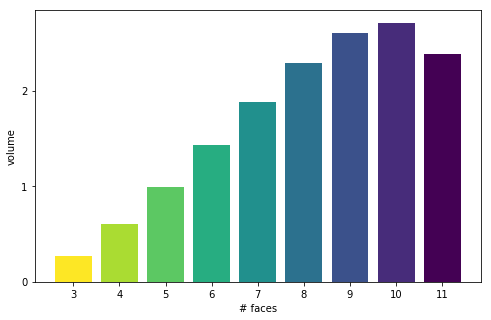

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

magna_tile = IsocTriangle(75)

plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.set_xlabel('# faces')
ax.set_ylabel('volume')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.bar(
    np.arange(9),
    [Pyramid(magna_tile, i).volume for i in range(3, 12)],
    color=plt.cm.get_cmap('viridis_r')(np.linspace(0,1,9)),
    tick_label=range(3, 12))
plt.show()

It's a tight race, but at nearly 3 cubic units, a 10-pyramid is the way to maximize volume. Interesting how close it becomes once you hit 8 faces.